In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mse-2-ai-201-b-aiml-a/sample_submission.csv
/kaggle/input/mse-2-ai-201-b-aiml-a/train.csv
/kaggle/input/mse-2-ai-201-b-aiml-a/test.csv


In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [103]:
df = pd.read_csv("/kaggle/input/mse-2-ai-201-b-aiml-a/train.csv")
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,79737.0,1165.818,483.7234,210.5411,80498.0,318.6288,0.9003,0.9905,0.7461,0.7372,2.2975,0.6587,A
1,81893.0,NaN,441.5179,237.5255,83087.0,322.9077,0.8430,NaN,0.7181,0.8098,1.8588,0.7314,B
2,82468.0,NaN,452.2654,232.5943,83212.0,324.0394,0.8576,0.9911,0.6277,0.8045,1.9444,0.7165,B
3,99270.0,1245.963,495.6917,255.7247,100359.0,355.5200,0.8567,0.9891,0.6966,0.8036,1.9384,NaN,A
4,70388.0,1044.665,426.7972,211.0762,71013.0,299.3673,0.8691,0.9912,0.7189,0.8105,2.0220,0.7014,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,NaN,1189.936,491.5606,222.7623,86234.0,329.6451,0.8914,0.9897,0.5997,0.7574,2.2067,0.6706,A
2020,93014.0,1246.667,519.2926,NaN,93928.0,344.1353,0.8973,0.9903,0.7539,0.7521,2.2659,NaN,NaN
2021,48098.0,925.191,395.8028,NaN,NaN,247.4677,0.9189,0.9888,0.6450,0.7061,2.5356,0.6252,A
2022,106858.0,1337.154,547.3261,249.5803,107957.0,368.8575,0.8900,0.9898,0.7254,NaN,2.1930,0.6739,NaN


In [104]:
df1 = pd.read_csv("/kaggle/input/mse-2-ai-201-b-aiml-a/test.csv")
df1.head()

,id,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,1,65457,1025.784,421.3851,199.1137,66401,288.6909,0.8813,0.9858,0.7277,0.7817,2.1163,0.6851
1,2,73550,1076.886,433.8194,216.6902,74260,306.0176,0.8663,0.9904,0.7065,0.7970,2.0020,0.7054
2,3,80519,1105.276,435.6902,236.2395,81250,320.1874,0.8402,0.9910,0.7417,0.8283,1.8443,0.7349
3,4,93323,1244.527,519.3040,229.4401,94506,344.7064,0.8971,0.9875,0.7532,0.7572,2.2634,0.6638
4,5,83005,1234.751,539.6816,196.7117,83725,325.0927,0.9312,0.9914,0.5750,0.6842,2.7435,0.6024


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               1854 non-null   float64
 1   Perimeter          1749 non-null   float64
 2   Major_Axis_Length  1776 non-null   float64
 3   Minor_Axis_Length  1791 non-null   float64
 4   Convex_Area        1874 non-null   float64
 5   Equiv_Diameter     1891 non-null   float64
 6   Eccentricity       1915 non-null   float64
 7   Solidity           1754 non-null   float64
 8   Extent             1800 non-null   float64
 9   Roundness          1772 non-null   float64
 10  Aspect_Ration      1927 non-null   float64
 11  Compactness        1738 non-null   float64
 12  Class              1752 non-null   object 
dtypes: float64(12), object(1)
memory usage: 205.7+ KB


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 750 non-null    int64  
 1   Area               750 non-null    int64  
 2   Perimeter          750 non-null    float64
 3   Major_Axis_Length  750 non-null    float64
 4   Minor_Axis_Length  750 non-null    float64
 5   Convex_Area        750 non-null    int64  
 6   Equiv_Diameter     750 non-null    float64
 7   Eccentricity       750 non-null    float64
 8   Solidity           750 non-null    float64
 9   Extent             750 non-null    float64
 10  Roundness          750 non-null    float64
 11  Aspect_Ration      750 non-null    float64
 12  Compactness        750 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 76.3 KB


In [107]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,1854.000000,1749.000000,1776.000000,1791.000000,1874.000000,1891.000000,1915.00000,1754.000000,1800.000000,1772.000000,1927.000000,1738.000000
mean,80323.690939,1127.498464,455.584148,225.262164,81228.839381,318.567273,0.86156,0.989437,0.691735,0.791209,2.047668,0.702851
std,13990.064084,111.336962,56.713034,23.193223,13814.034318,27.302369,0.04479,0.003697,0.061022,0.056062,0.317495,0.052798
min,47939.000000,868.485000,324.011300,154.002000,48366.000000,247.058400,0.65860,0.918600,0.468000,0.582500,1.329000,0.560800
25%,70216.000000,1043.926000,412.771775,210.086400,70948.250000,298.894850,0.83210,0.988300,0.656750,0.749600,1.805850,0.661300
50%,78921.000000,1118.627000,448.849200,224.042400,79829.500000,316.974100,0.86570,0.990200,0.710700,0.797500,1.991200,0.705300
75%,89350.000000,1201.859000,492.200125,240.448300,90747.000000,337.089950,0.89820,0.991500,0.739500,0.834800,2.274400,0.741400
max,135455.000000,1520.525000,640.190700,300.577700,136373.000000,415.291100,0.94810,0.993900,0.829600,0.939600,3.144400,0.866500


In [108]:
df.isnull().sum()

Area                 170
Perimeter            275
Major_Axis_Length    248
Minor_Axis_Length    233
Convex_Area          150
Equiv_Diameter       133
Eccentricity         109
Solidity             270
Extent               224
Roundness            252
Aspect_Ration         97
Compactness          286
Class                272
dtype: int64

In [109]:
y = df["Class"]


In [110]:
# le_target = LabelEncoder()
# y = le_target.fit_transform(y.astype(str))
# y
y = y.map({"A":0,"B":1})
y


0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
2019    0.0
2020    NaN
2021    0.0
2022    NaN
2023    0.0
Name: Class, Length: 2024, dtype: float64

In [111]:
y = y.fillna(y.median())
y

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
2019    0.0
2020    1.0
2021    0.0
2022    1.0
2023    0.0
Name: Class, Length: 2024, dtype: float64

In [112]:
X = df.drop(["Class"],axis = 1)
X.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,79737.0,1165.818,483.7234,210.5411,80498.0,318.6288,0.9003,0.9905,0.7461,0.7372,2.2975,0.6587
1,81893.0,NaN,441.5179,237.5255,83087.0,322.9077,0.8430,NaN,0.7181,0.8098,1.8588,0.7314
2,82468.0,NaN,452.2654,232.5943,83212.0,324.0394,0.8576,0.9911,0.6277,0.8045,1.9444,0.7165
3,99270.0,1245.963,495.6917,255.7247,100359.0,355.5200,0.8567,0.9891,0.6966,0.8036,1.9384,NaN
4,70388.0,1044.665,426.7972,211.0762,71013.0,299.3673,0.8691,0.9912,0.7189,0.8105,2.0220,0.7014


In [113]:
X = X.fillna(X.mean(numeric_only = True))
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2024 non-null   float64
 1   Perimeter          2024 non-null   float64
 2   Major_Axis_Length  2024 non-null   float64
 3   Minor_Axis_Length  2024 non-null   float64
 4   Convex_Area        2024 non-null   float64
 5   Equiv_Diameter     2024 non-null   float64
 6   Eccentricity       2024 non-null   float64
 7   Solidity           2024 non-null   float64
 8   Extent             2024 non-null   float64
 9   Roundness          2024 non-null   float64
 10  Aspect_Ration      2024 non-null   float64
 11  Compactness        2024 non-null   float64
dtypes: float64(12)
memory usage: 189.9 KB


In [127]:
def cap_outliers(df,cols,l=1,u = 99):
    for col in cols:
        lv = df[col].quantile(l/100)
        uv = df[col].quantile(u/100)
        df[col] = df[col].clip(lv,uv)
    return df
num_cols = X.select_dtypes(include = ["float64"]).columns
X = cap_outliers(X,num_cols)


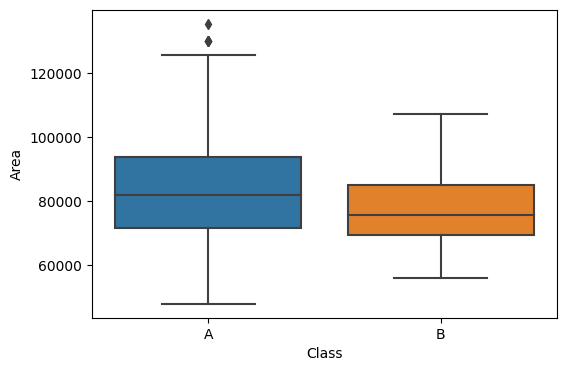

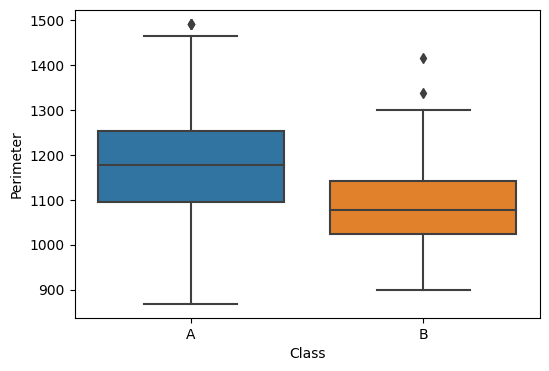

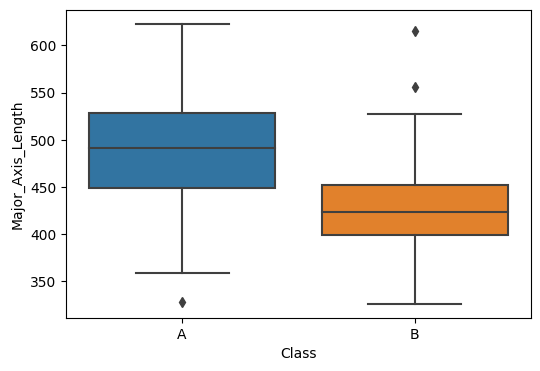

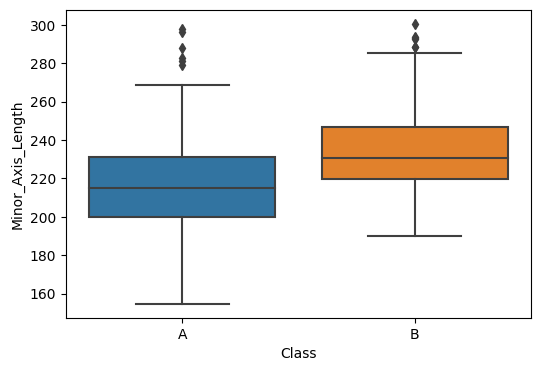

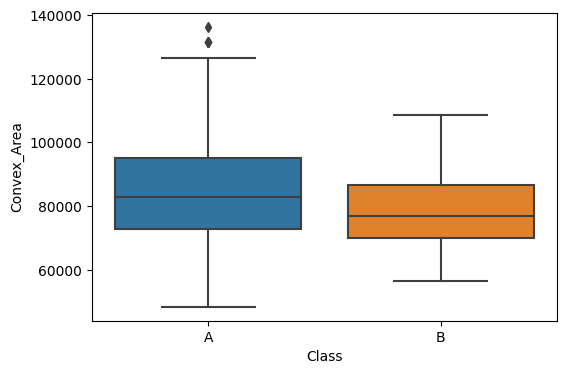

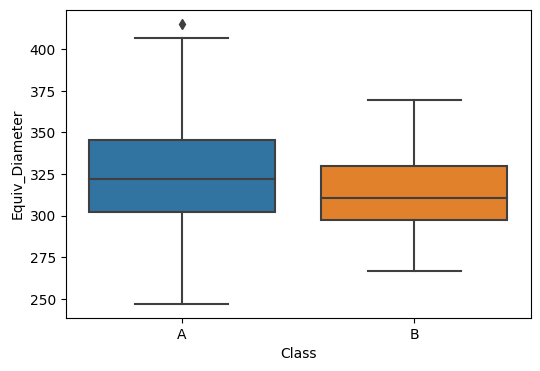

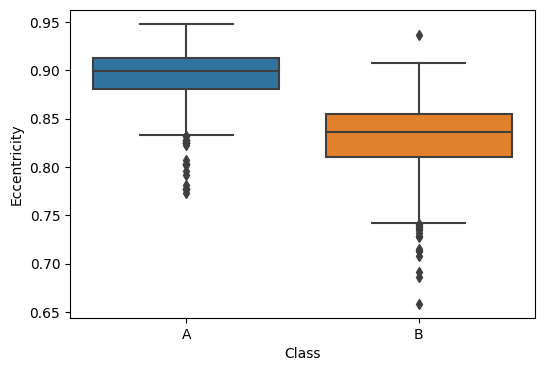

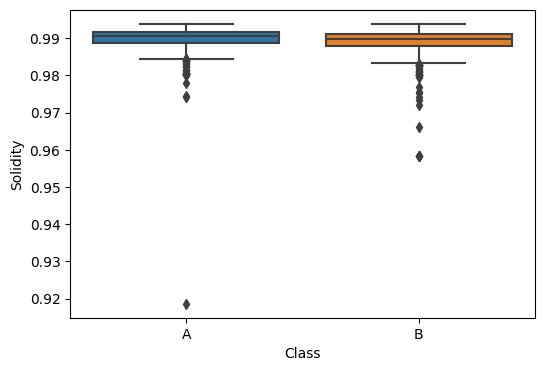

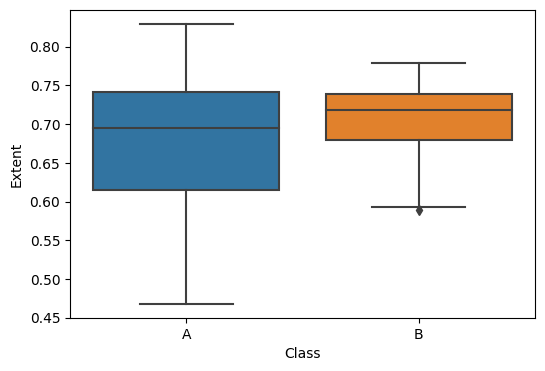

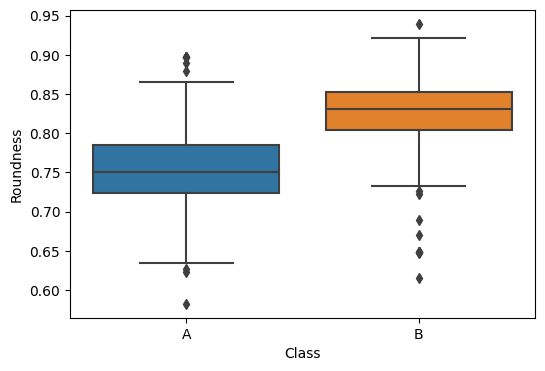

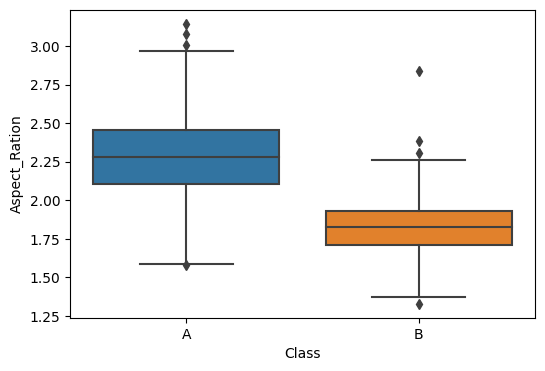

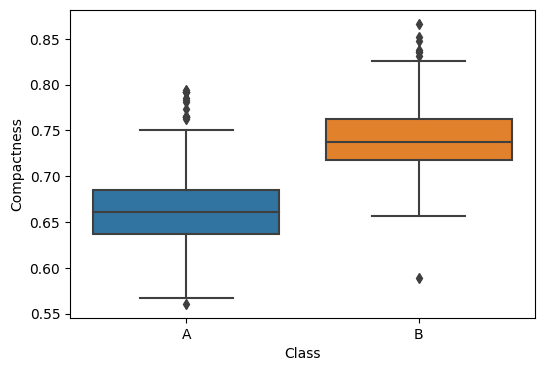

In [140]:
cat_col = "Class"
for col in num_cols:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = cat_col,y = col,data = df)

<Axes: >

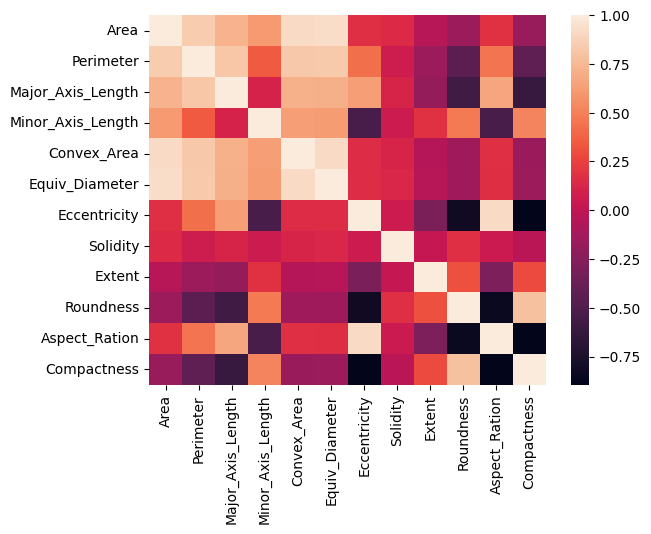

In [128]:
sns.heatmap(X.corr())

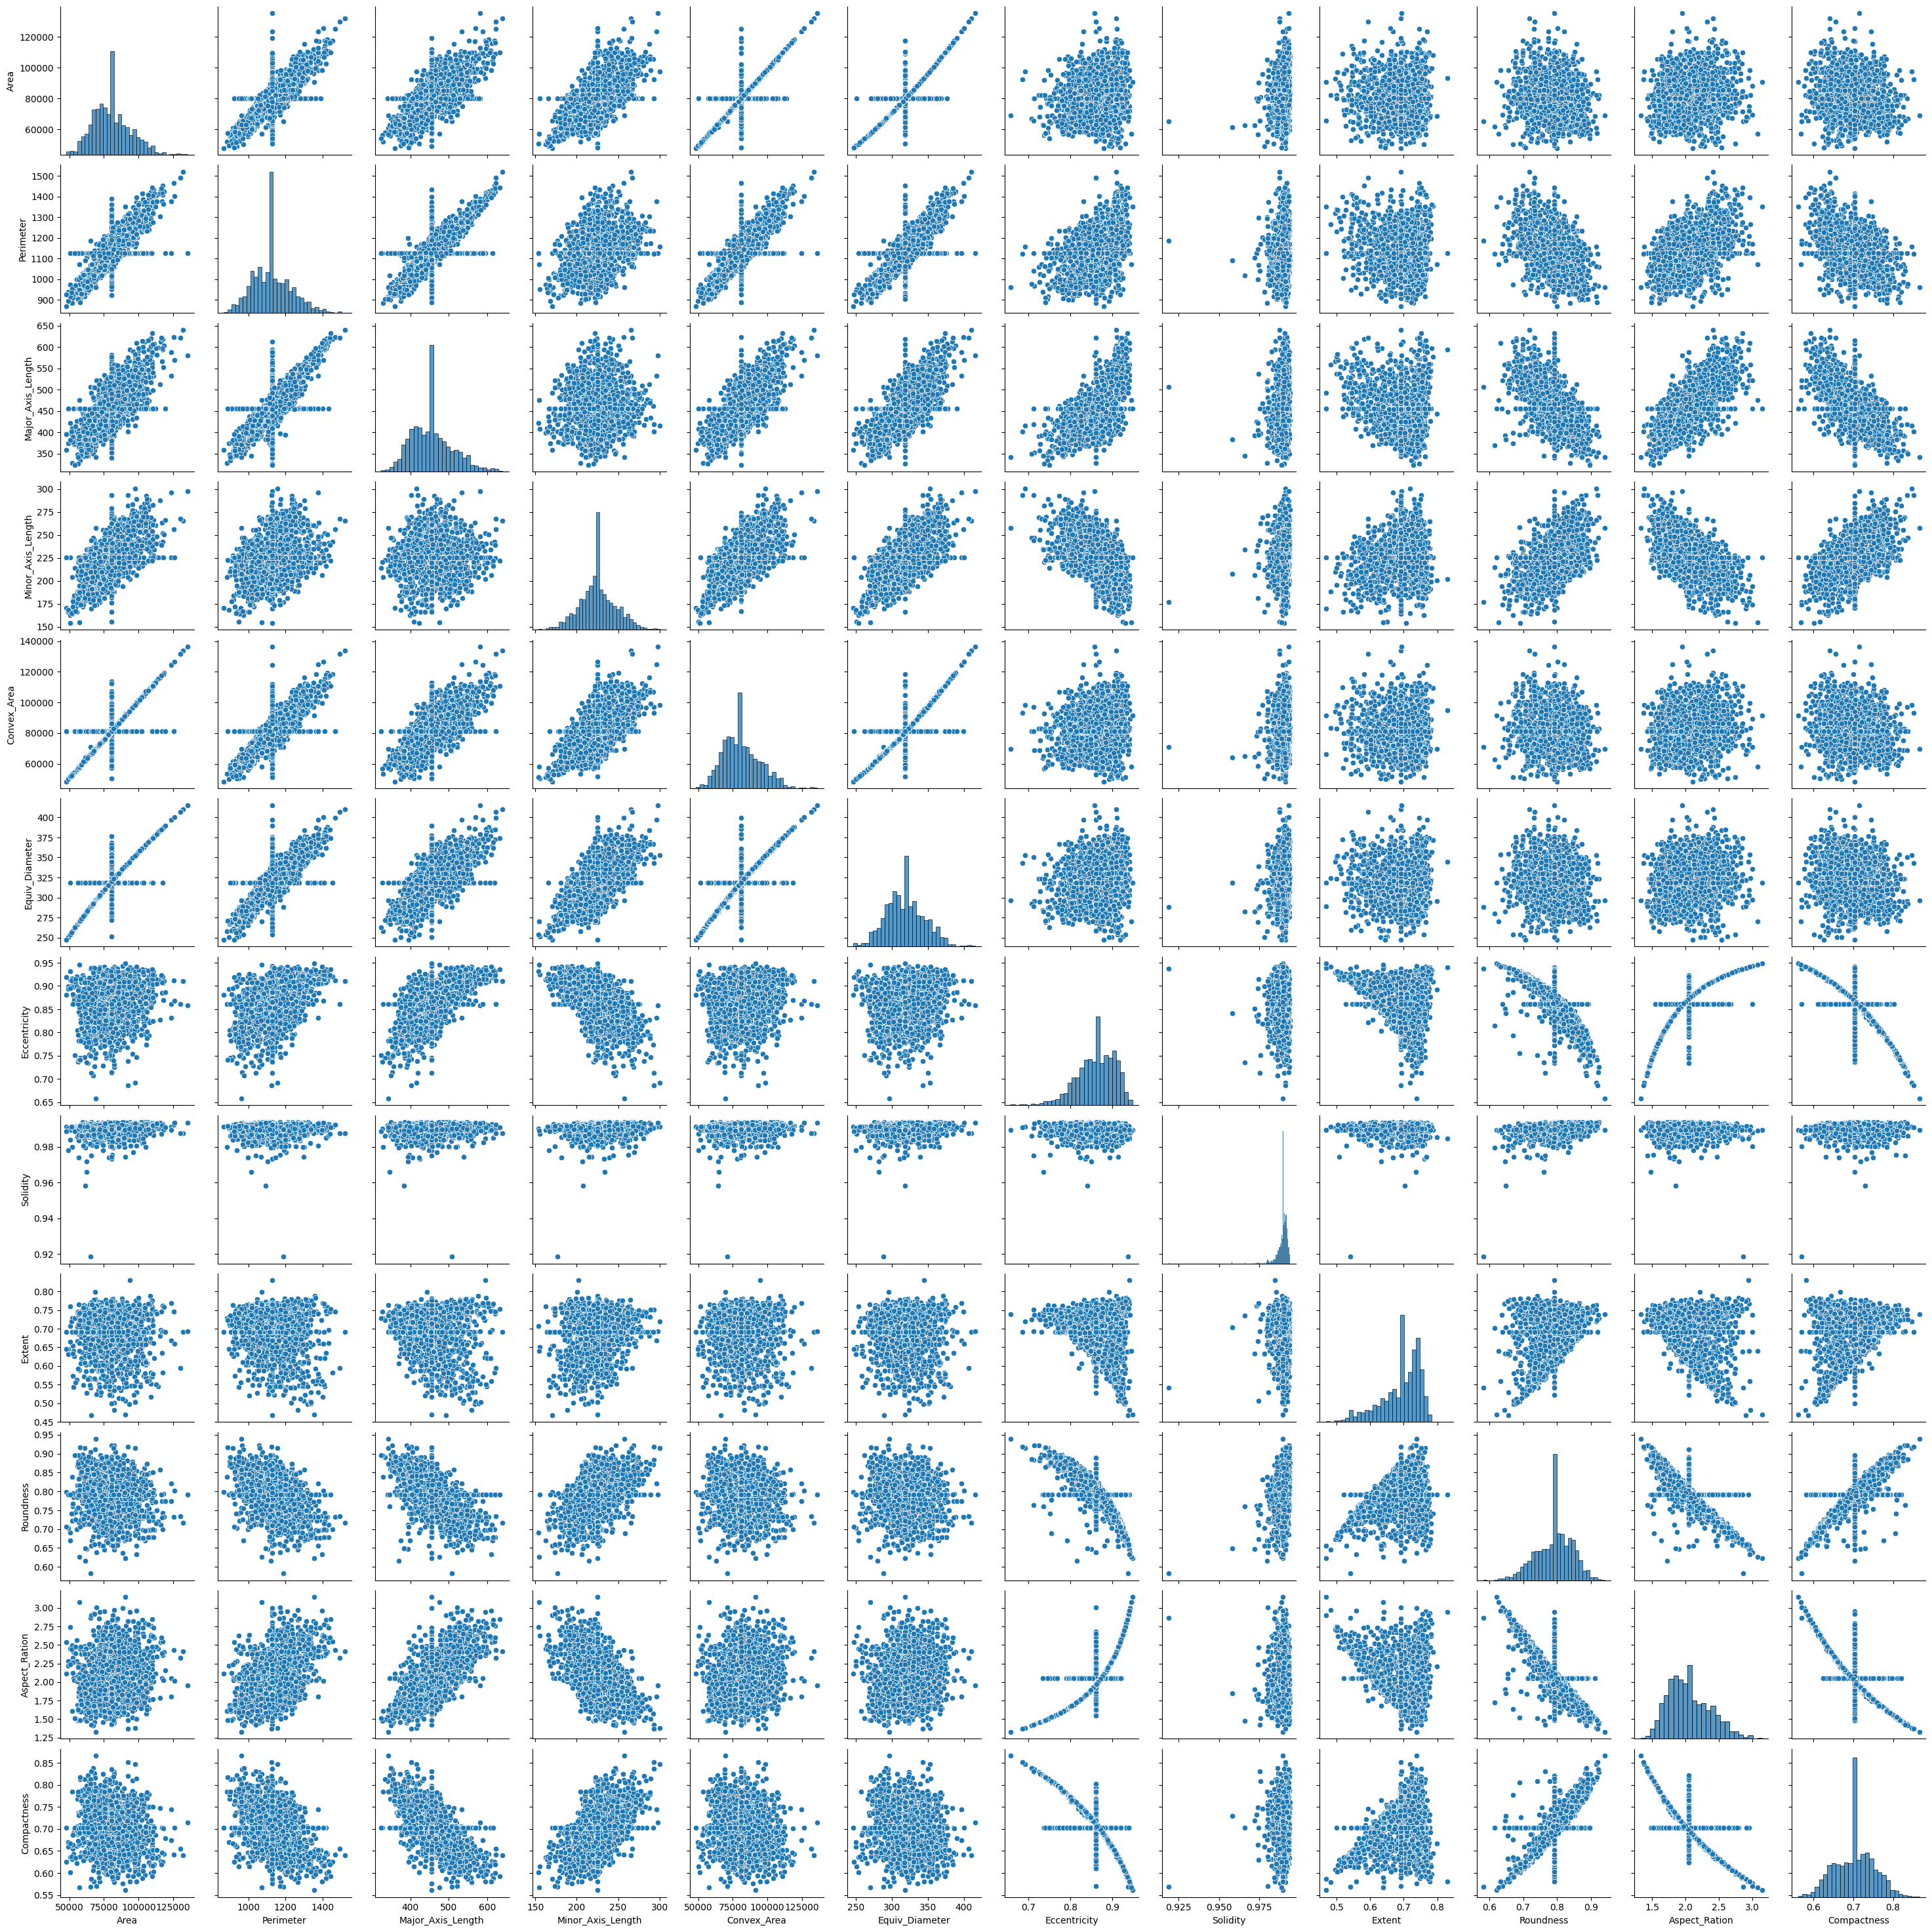

In [115]:
sns.pairplot(X)

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)
X_train.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
1451,113908.36,1406.19675,605.928513,267.302100,112408.540000,379.3251,0.86156,0.987500,0.5943,0.734300,2.325900,0.654600
1603,72007.00,1067.72600,455.584148,225.262164,72908.000000,302.7906,0.86620,0.987600,0.6383,0.791209,2.001400,0.702851
520,84842.00,1130.44800,429.427500,253.505100,86185.000000,328.6703,0.80720,0.984400,0.6864,0.834300,1.694000,0.765400
1703,95816.00,1274.01800,531.322100,230.406800,81228.839381,349.2803,0.90110,0.989437,0.7296,0.741800,2.047668,0.657400
451,97595.00,1216.69500,463.653100,270.281400,98794.000000,352.5079,0.81250,0.987900,0.6919,0.828500,1.715400,0.760300


In [130]:
model = RandomForestClassifier(n_estimators = 1000,max_depth = 50,min_samples_split = 2,min_samples_leaf = 1,max_features = 'sqrt')
model.fit(X_train,y_train)


RandomForestClassifier(max_depth=50, n_estimators=1000)

In [132]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(
    objective = "multiclass",
    n_estimators = 1000,
    learning_rate = 0.01,
    num_leaves = 31,
    num_classes = 2,
    colsample_bytree = 0.8,
    reg_alpha = 0.1,
    reg_lambda = 1.0,
    n_jobs = -1,
    random_state = 42
)
clf.fit(X_train,y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2908
[LightGBM] [Info] Number of data points in the train set: 1619, number of used features: 12
[LightGBM] [Info] Start training from score -0.847092
[LightGBM] [Info] Start training from score -0.559770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, n_estimators=1000,
               n_jobs=-1, num_classes=2, objective='multiclass',
               random_state=42, reg_alpha=0.1, reg_lambda=1.0)

In [133]:
y_p = clf.predict(X_test)
a = accuracy_score(y_test,y_p)
a

0.8716049382716049

In [131]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.8641975308641975

In [134]:
test_ids = df1["id"]
x_test = df1.drop(["id"],axis = 1)


In [135]:
y_pred_f = clf.predict(x_test)
# y_pred_f
y_pred_df = pd.DataFrame(y_pred_f)
y_pred_df

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
745,1.0
746,1.0
747,1.0
748,1.0


In [136]:
y_pred1 = y_pred_df[0].map({0.0:"A",1.0:"B"})
y_pred1

0      B
1      B
2      B
3      B
4      A
      ..
745    B
746    B
747    B
748    B
749    B
Name: 0, Length: 750, dtype: object

In [137]:
submission = pd.DataFrame({
    "id" : test_ids,
    "Class" : y_pred1
})
submission.to_csv("amit.csv",index = False)
submission.head()

,id,Class
0,1,B
1,2,B
2,3,B
3,4,B
4,5,A
